<a href="https://colab.research.google.com/github/kalravm41/project119/blob/main/project119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

accuracy: 1.0


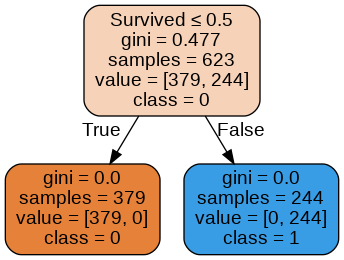

In [16]:
import pandas as pd
import plotly.express as px
import csv
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus



column = ['PassengerId','Pclass','Sex','Age', 'SibSp', 'Parch', 'Survived']
df = pd.read_csv('data.csv', names= column).iloc[1:]

features= ['PassengerId','Pclass','Sex','Age', 'SibSp', 'Parch', 'Survived']

X= df[features]
y= df.Survived
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size= 0.3, random_state= 20)

DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, Y_train)

YPredict= DTC.predict(X_test)

print('accuracy:', metrics.accuracy_score(Y_test, YPredict))

Dot_data = StringIO()

export_graphviz(DTC, out_file= Dot_data, filled= True, rounded= True, special_characters= True, feature_names= features, class_names= ['0','1'])

graph= pydotplus.graph_from_dot_data(Dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())